In [9]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import scipy
import statsmodels.api as sm

In [2]:
import seaborn as sns
sns.set()

In [3]:
data = pd.read_csv('Multiple.csv')

In [4]:
data.describe()

,SAT,"Rand 1,2,3",GPA
count,84.000000,84.000000,84.000000
mean,1845.273810,2.059524,3.330238
std,104.530661,0.855192,0.271617
min,1634.000000,1.000000,2.400000
25%,1772.000000,1.000000,3.190000
50%,1846.000000,2.000000,3.380000
75%,1934.000000,3.000000,3.502500
max,2050.000000,3.000000,3.810000


In [18]:
import gc

gc.collect()

0

In [15]:
y = data['GPA']
x1 = data[['SAT', 'Rand 1,2,3']]

In [16]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()

In [17]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           6.58e-10
Time:                        16:50:00   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# varaibale Rand 1,2,3 -> p-value -=0.762 high level of significance for coefficient =0
# Varaible Rand 1,2,3 not only worsen the explanotory power, 
# but it is also significcant
# so, we should remove the variable Rand 1,2,3

# bias of the Rand 1,2,3 is reflected into the coefficients of the other variables.


In [22]:
raw_data = pd.read_csv('dummies.csv')

In [23]:
data = raw_data.copy()


In [24]:
data['Attendance'] = data['Attendance'].map({'Yes':1, 'No':0})

In [26]:
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


# Regression

In [28]:
y = data['GPA']
x1 = data[['SAT', 'Attendance']]

In [29]:
x = sm.add_constant(x1)

In [30]:
results = sm.OLS(y,x).fit()

In [32]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           2.19e-15
Time:                        14:01:36   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Conclusion from the above statistics
1. F-statistic -> overall model is significant
2. as P>|t| = 0 for SAT and Attendance - both the variables are significant.

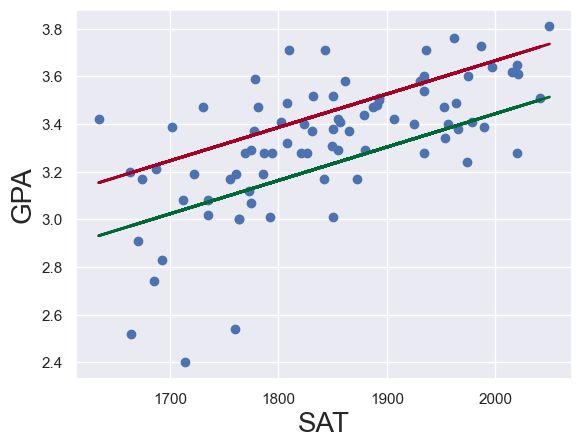

In [33]:
plt.scatter(data['SAT'], y)
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']
fig = plt.plot(data['SAT'], yhat_no, lw=2, c='#006837' )
fig = plt.plot(data['SAT'], yhat_yes, lw=2, c='#a50026')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()

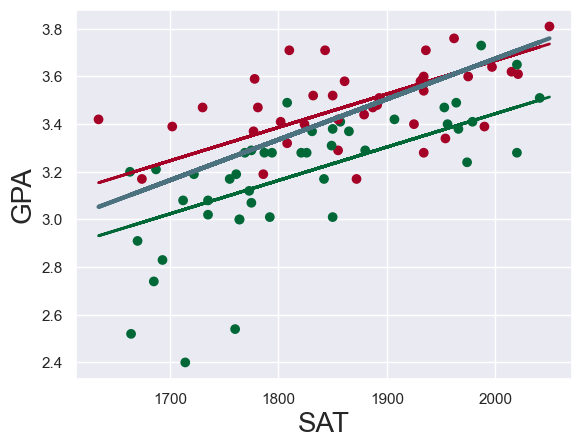

In [36]:
plt.scatter(data['SAT'], y, c= data['Attendance'], cmap='RdYlGn_r')
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']
yhat = 0.0017*data['SAT'] +0.275
fig = plt.plot(data['SAT'], yhat_no, lw=2, c='#006837', label="regression line 1" )
fig = plt.plot(data['SAT'], yhat_yes, lw=2, c='#a50026', label="regression line 2")
fig = plt.plot(data['SAT'], yhat, lw=3, c='#4c7280', label="regression line 3")
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()

In [37]:
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


Predicting GPA for Bob and Alice

In [38]:
new_data = pd.DataFrame({'const':1, 'SAT':[1700, 1670], 'Attendance':[0,1]})

In [40]:
new_data = new_data[['const', 'SAT','Attendance']]
print(new_data)
new_data = new_data.rename(index={0:'Bob', 1:'Alice'})
print(new_data)

   const   SAT  Attendance
0      1  1700           0
1      1  1670           1
       const   SAT  Attendance
Bob        1  1700           0
Alice      1  1670           1


In [41]:
predictions = results.predict(new_data)

In [42]:
predictions

Bob      3.023513
Alice    3.204163
dtype: float64

StartUp Data

<img src='Problem_Statement.png'/>

In [46]:
data = pd.read_csv('Startups.csv')
data[:10]

,R&D Expenditure,Administration Expenditure,Marketing Expenditure,State,Profit
0,165349.20,136897.80,471784.10,Florida,192261.83
1,162597.70,151377.59,443898.53,Florida,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,Florida,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,Florida,156991.12
6,134615.46,147198.87,127716.82,Florida,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,Florida,152211.77
9,123334.88,108679.17,304981.62,Florida,149759.96


In [64]:
y = data['Profit']
x1 = data[['Marketing Expenditure']]
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           4.38e-10
Time:                        17:00:30   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                      6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing Expenditure     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
new_data = pd.DataFrame({'Const':1,'Marketing Expenditure': [325000]})
print(new_data)

   Const  Marketing Expenditure
0      1                 325000


In [70]:
predictions = results.predict(new_data)
print(predictions)

0    140102.809762
dtype: float64


In [71]:
y = data['Profit']
x1 = data[['Marketing Expenditure','R&D Expenditure', 'Administration Expenditure']]

In [72]:
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           4.53e-30
Time:                        17:09:25   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
Marketing Expenditure          0.0272      0.016      1.655      0.105      -0.006       0.060
R&D Expenditure                0.8057      0.045     17.846      0.000       0.715       0.897
Administration Expenditure    -0.0268      0.051     -0.526      0.602      -0.130       0.076
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


Based on the coefficients table,the administration and marketing expenditures are mot significant at the 5% level. 
p-value of 'R&D Expenditure' is virtually 0 and the coefficient is statistically significant.

the p-value of the F-statistics gives us an idea of the probability that the null hypothesis cannot be rejected. probability of F-statistics are close to 0, hence the overall model is significant.

In [73]:
y = data['Profit']
x1 = data[['R&D Expenditure']]

In [74]:
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           3.50e-32
Time:                        17:13:16   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
R&D Expenditure     0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
new_data = pd.DataFrame({'Const':1,'R&D Expenditure': [125000]})
print(new_data)

   Const  R&D Expenditure
0      1           125000


In [76]:
predictions = results.predict(new_data)
print(predictions)

0    155819.320509
dtype: float64


## Sklearn

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
data = pd.read_csv('Multiple.csv')

In [79]:
data[:4]

,SAT,"Rand 1,2,3",GPA
0,1714,1,2.40
1,1664,3,2.52
2,1760,3,2.54
3,1685,3,2.74


In [80]:
data.describe()

,SAT,"Rand 1,2,3",GPA
count,84.000000,84.000000,84.000000
mean,1845.273810,2.059524,3.330238
std,104.530661,0.855192,0.271617
min,1634.000000,1.000000,2.400000
25%,1772.000000,1.000000,3.190000
50%,1846.000000,2.000000,3.380000
75%,1934.000000,3.000000,3.502500
max,2050.000000,3.000000,3.810000


sample -> machine learning word for observation

In [81]:
# dependent variables
x = data[['SAT', 'Rand 1,2,3']]
# independent variables
y = data['GPA']

In [82]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [83]:
# coefficents for SAT and Rand 1,2,3
reg.coef_

array([ 0.00165354, -0.00826982])

In [84]:
reg.intercept_

0.29603261264909486

#### calculating R-squared


In [86]:
reg.score(x,y)

0.40668119528142843

#### Formula for Adjusted R^2

$R^2_{adj.} = 1 - (1 - R^2)*\frac{n-1}{n-p-1}$


n - no of observations

p - no. of predictors 

In [87]:
x.shape

(84, 2)

In [95]:
r2 = reg.score(x,y)
# n = 84
# p = 2
n = x.shape[0]
p = x.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n-1)/(n-p-1)

In [96]:
print("adjusted R2 is :", adjusted_r2)

adjusted R2 is : 0.39203134825134023


In [93]:
#  writing function for calculating adjusted r2

def adjustedScore(x,y):
    reg = LinearRegression()
    reg.fit(x,y)
    r2 = reg.score(x,y)
    adjusted_r2 = 1 - (1 - r2) * (n-1)/(n-p-1)
    print(adjusted_r2)


In [94]:
adjustedScore(x,y)

0.39203134825134023
